In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import math

In [3]:
frame = 0

seg_2d = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\ESTNEMC0027_2_frame{}_001.nii.gz'.format(frame))
seg_2d_pixel_data = sitk.GetArrayFromImage(seg_2d)

seg_2d_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations ORIGINALS\EST-NEMC-0027-RCx.nii.gz')
seg_2d_pixel_data_orig = sitk.GetArrayFromImage(seg_2d_orig)

seg_2d_pred = sitk.ReadImage(r'Z:\silvan\Projects\CardiacOCT_nnunet\nnUNet_raw_data\Task102_CardiacOCT\labelsTr\EST-NEMC-0027-RCx_frame_{}_0.nii.gz'.format(frame+1))
seg_2d_pixel_data_pred = sitk.GetArrayFromImage(seg_2d_pred)

In [4]:
unique, counts = np.unique(seg_2d_pixel_data, return_counts=True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(seg_2d_pixel_data_orig[frame,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(seg_2d_pixel_data_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.00000e+00 4.29542e+05]
 [1.00000e+00 2.78020e+04]
 [2.00000e+00 1.89080e+04]
 [3.00000e+00 7.53700e+03]
 [4.00000e+00 3.01000e+02]
 [5.00000e+00 2.87000e+02]
 [6.00000e+00 4.31600e+03]
 [7.00000e+00 6.92300e+03]]
[[     0 909212]
 [     1  58332]
 [     2  39537]
 [     3  16451]
 [     6  10168]
 [     7  14876]]
[[     0 227949]
 [     1  14585]
 [     2   9241]
 [     3   4116]
 [     6   2531]
 [     7   3722]]


In [5]:
seg_2d_pixel_data_pred

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)

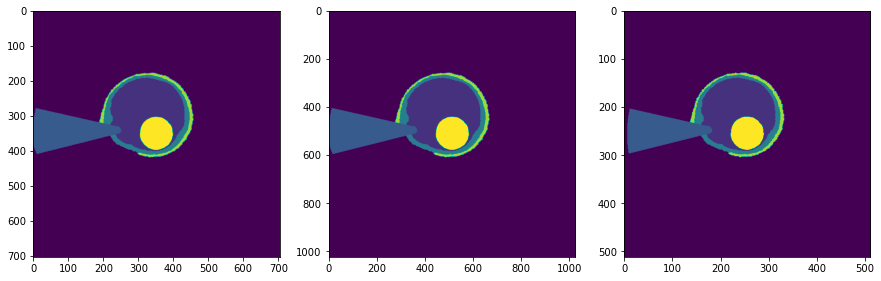

In [189]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(seg_2d_pixel_data[0])
axes[1].imshow(seg_2d_pixel_data_orig[frame,:,:])
axes[2].imshow(seg_2d_pixel_data_pred[0])

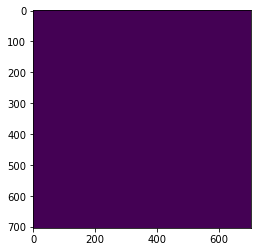

In [123]:
rows, cols = seg_2d_pixel_data[0].shape

for i in range(rows):
    for j in range(cols):
        if int(seg_2d_pixel_data[0, i, j]) == 4:
            seg_2d_pixel_data[0, i, j] = 1

        else:
            seg_2d_pixel_data[0, i, j] = 0

plt.imshow(seg_2d_pixel_data[0])

In [2]:
dataset_props = np.load(r'Z:\grodriguez\CardiacOCT\data\nnUNet_preprocessed\Task502_CardiacOCT\nnUNetPlansv2.1_plans_3D.pkl', allow_pickle=True)

In [4]:
dataset_props['original_sizes']

[(269, 679, 679),
 (270, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (269, 679, 679),
 (374, 679, 679),
 (540, 679, 679),
 (375, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (540, 679, 679),
 (538, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (373, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (375, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (539, 667, 667),
 (540, 673, 673),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 673, 673),
 (539, 679, 679),
 (539, 679

In [8]:
pkl_img.keys()

odict_keys(['original_size_of_raw_data', 'original_spacing', 'list_of_data_files', 'seg_file', 'itk_origin', 'itk_spacing', 'itk_direction', 'crop_bbox', 'classes', 'size_after_cropping', 'use_nonzero_mask_for_norm', 'size_after_resampling', 'spacing_after_resampling', 'class_locations'])

In [47]:
for channel in range(3):
    for frame in range(len(img_pixel_data)):
        if np.any(np.isnan(img_pixel_data[channel,frame,:,:]).flatten()):
            print('Nan found')
        else:
            continue
    

0
1
2


(4, 269, 679, 679)


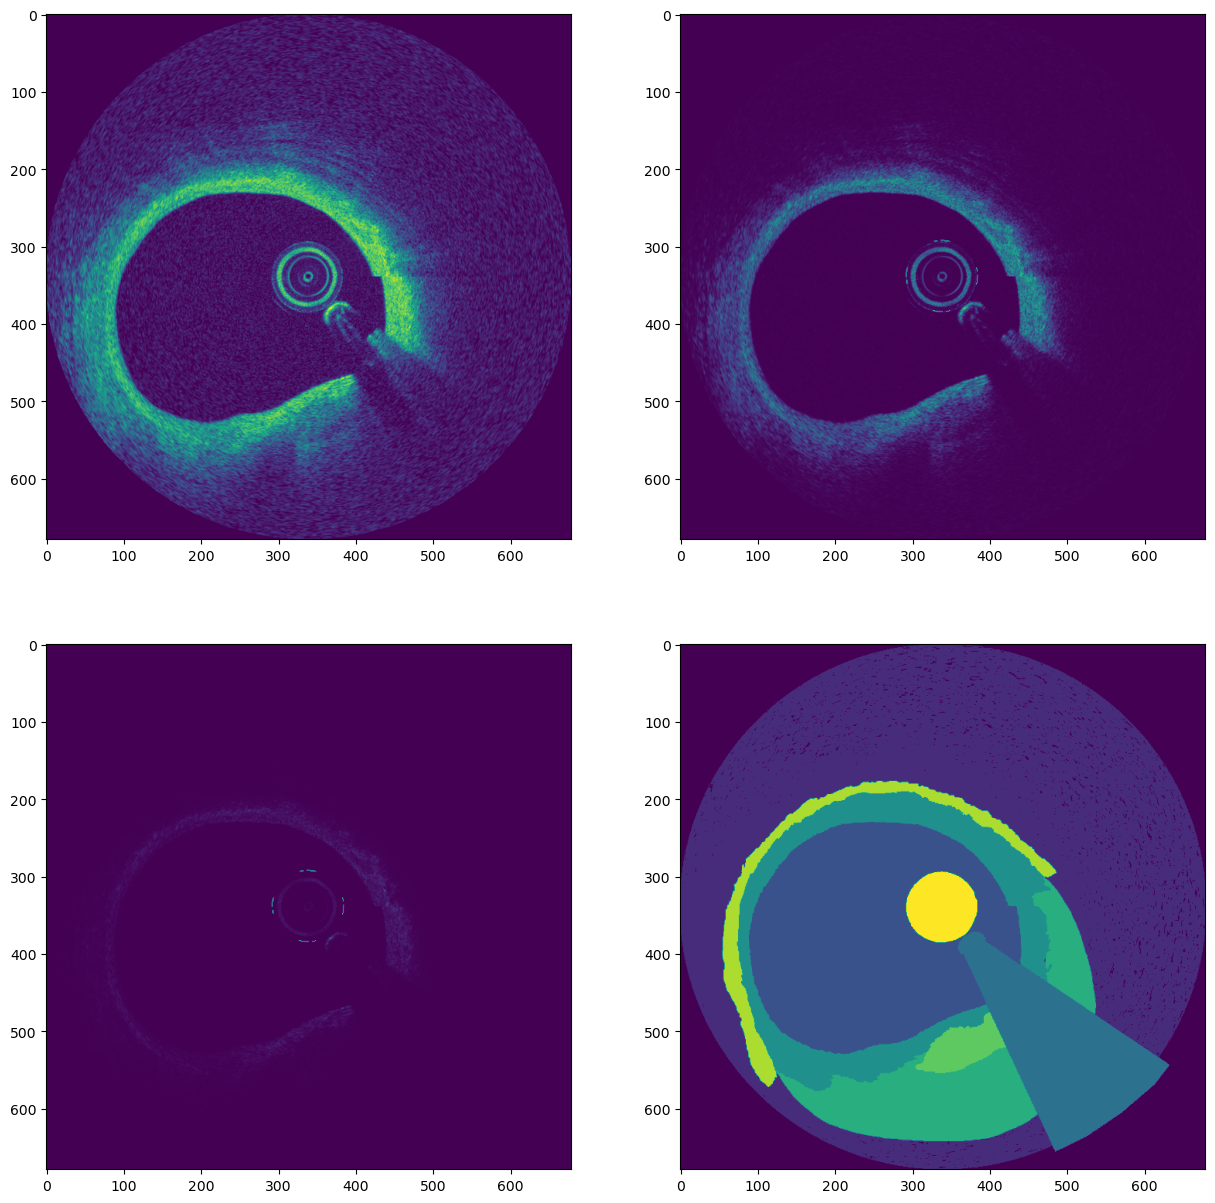

In [17]:
print(img_pixel_data.shape)

frame = 268

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes = axes.flatten()
axes[0].imshow(img_pixel_data[0,frame,:,:])
axes[1].imshow(img_pixel_data[1,frame,:,:])
axes[2].imshow(img_pixel_data[2,frame,:,:])
axes[3].imshow(img_pixel_data[3,frame,:,:])

In [19]:
unique, counts = np.unique(img_pixel_data[3,frame,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1.00000e+00  1.02320e+05]
 [ 0.00000e+00  1.69322e+05]
 [ 1.00000e+00  7.06300e+04]
 [ 2.00000e+00  3.24610e+04]
 [ 3.00000e+00  3.19820e+04]
 [ 4.00000e+00  3.11280e+04]
 [ 5.00000e+00  5.05700e+03]
 [ 6.00000e+00  1.16230e+04]
 [ 7.00000e+00  6.51800e+03]]


In [9]:
seg_raw = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-3d\nnUNet_raw_data\Task503_CardiacOCT\labelsTr\ESTNEMC0027RCA_001.nii.gz')
seg_raw_data = sitk.GetArrayFromImage(seg_raw)

In [10]:
seg_raw_data[frame,:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
for key in seg.GetMetaDataKeys():
    if seg.GetMetaData(key) != img.GetMetaData(key):
        print(key)
        print('Img:', img.GetMetaData(key))
        print('Seg:', seg.GetMetaData(key))

bitpix
Img: 64
Seg: 32
datatype
Img: 64
Seg: 8


In [32]:
for frame in range(len(img_pixel_data)):

    for i in seg_pixel_data[frame,:,:].flatten():
        if isinstance(i, np.int32):
            continue
        else:
            print('Encountered different type')

In [58]:
print(list(dataset_props)[14])
print(dataset_props[list(dataset_props)[14]])

min_region_size_per_class
None


In [5]:
pkl_2d_image = np.load(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_preprocessed\Task501_CardiacOCT\nnUNetData_plans_v2.1_2D_stage0\ESTNEMC0027_1_frame27_001.npz')
pkl_2d_image_data = pkl_2d_image['data']

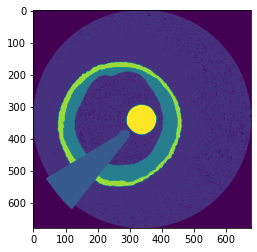

In [9]:
plt.imshow(pkl_2d_image_data[3,0,:,:])